In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import joblib
from IPython.display import display

In [2]:
path = pathlib.Path("D:/Documents/Datasets/AirbnbDataset")
months = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
          "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

all_df = pd.DataFrame()
for f in path.iterdir():
    num_month = months[f.name[:3]]
    year = int(f.name[-8:-4])
    df = pd.read_csv(path / f.name)
    df["year"] = year
    df["month"] = num_month
    all_df = all_df.append(df)

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\3991894064.py:9: DtypeWarning:

Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\3991894064.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\3991894064.py:9: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\3991894064.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\3991894064.py:9: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\3991894064.py:12: FutureW

In [3]:
display(all_df)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902210 entries, 0 to 34328
Columns: 108 entries, id to calculated_host_listings_count_shared_rooms
dtypes: float64(31), int64(15), object(62)
memory usage: 750.3+ MB


In [5]:

columns = ['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
'bed_type', 'amenities', 'price', 'guests_included','extra_people',
'minimum_nights', 'maximum_nights', 'number_of_reviews', 'instant_bookable',
'is_business_travel_ready', 'cancellation_policy', 'year', 'month']

all_df = all_df[columns]

display(all_df)

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,2,$34.00,60,365,38,f,f,strict_14_with_grace_period,2018,4
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,...,2,$51.00,4,90,205,t,f,strict,2018,4
2,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,2,$215.00,3,90,85,f,f,strict,2018,4
3,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,2,$45.00,4,30,208,f,f,strict,2018,4
4,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,2,$68.00,2,1125,200,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,2,$50.00,1,1125,0,f,f,flexible,2019,9
34325,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,...,1,$0.00,2,1125,0,f,f,flexible,2019,9
34326,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,...,3,$30.00,3,1125,0,f,f,strict_14_with_grace_period,2019,9
34327,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,1,$0.00,1,1125,0,f,f,strict_14_with_grace_period,2019,9


In [6]:
all_df.isna().sum()

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
year                           0
month                          0
dtype: int64

In [7]:
all_df = all_df.dropna()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897709 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  object 
 13  guests_included           897709 non-null  in

In [8]:
all_df["price"] = all_df["price"].str.replace("$", "")
all_df["price"] = all_df["price"].str.replace(",", "")
all_df["price"] = all_df["price"].astype(np.float32, copy=False)

all_df["extra_people"] = all_df["extra_people"].str.replace("$", "")
all_df["extra_people"] = all_df["extra_people"].str.replace(",", "")
all_df["extra_people"] = all_df["extra_people"].astype(np.float32, copy=False)

all_df.info()

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\448458346.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\digof\AppData\Local\Temp\ipykernel_4288\448458346.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 897709 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  float32
 13  guests_included           897709 non-null  in

<AxesSubplot:>

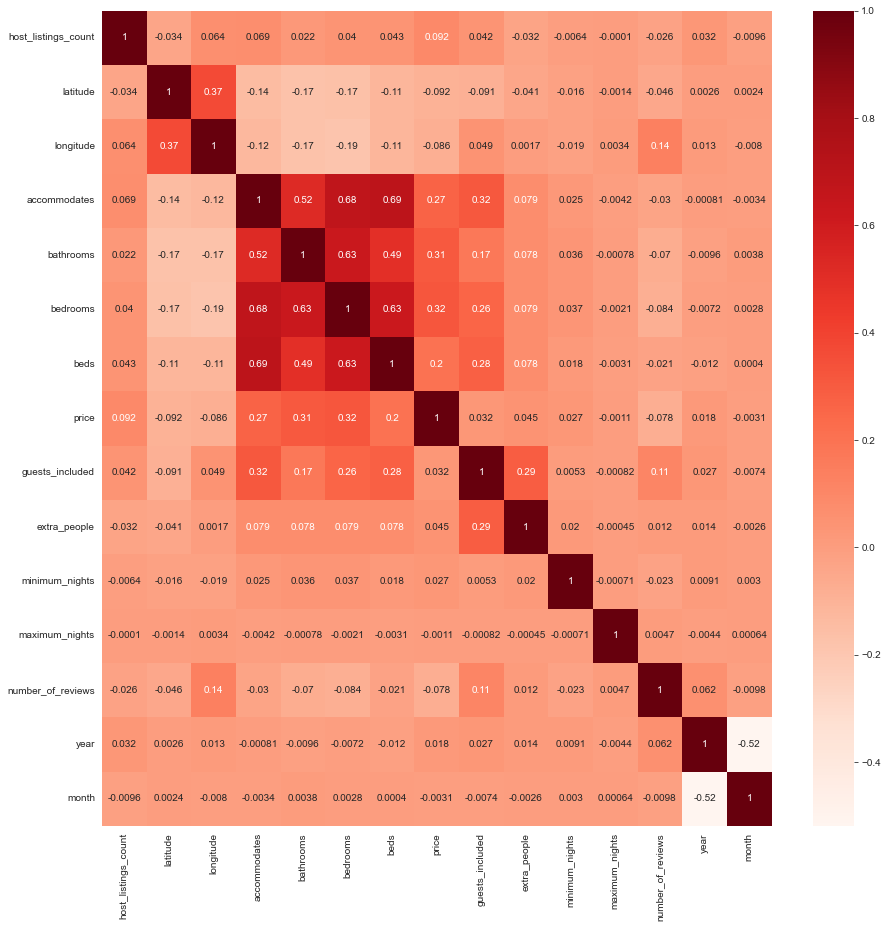

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
sns.heatmap(all_df.corr(), annot=True, cmap="Reds")

In [10]:
def limit(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    rangeV = q3 - q1
    return q1 - 1.5 * rangeV, q3 + 1.5 * rangeV

def remove_outliers(df, column_name):
    qty_values = df.shape[0]
    inf_lim, sup_lim = limit(df[column_name])
    df = df.loc[(df[column_name] >= inf_lim) & (df[column_name] <= sup_lim), :]
    return df, qty_values - df.shape[0]


In [11]:
def diagram_box(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x = column, ax = ax1)
    ax2.set_xlim(limit(column))
    sns.boxplot(x = column, ax = ax2)

def histogram(column):
    plt.figure(figsize = (15, 5))
    sns.distplot(column, hist=True)

def bar(column):
    plt.figure(figsize = (15, 5))
    ax = sns.barplot(x = column.value_counts().index, y = column.value_counts())
    #ax.set_xlim(limit(column))

c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



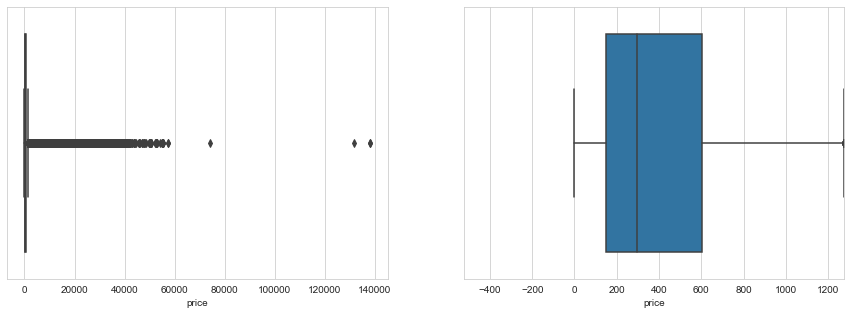

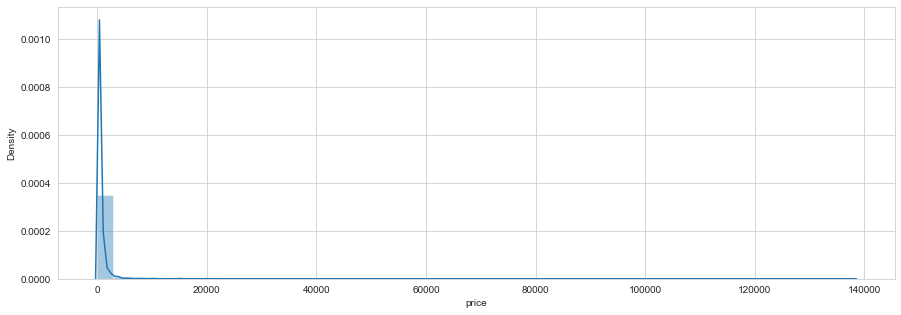

In [12]:
diagram_box(all_df["price"])
histogram(all_df["price"])

In [13]:
all_df, removed_lines = remove_outliers(all_df, "price")
print(removed_lines)

87282


c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



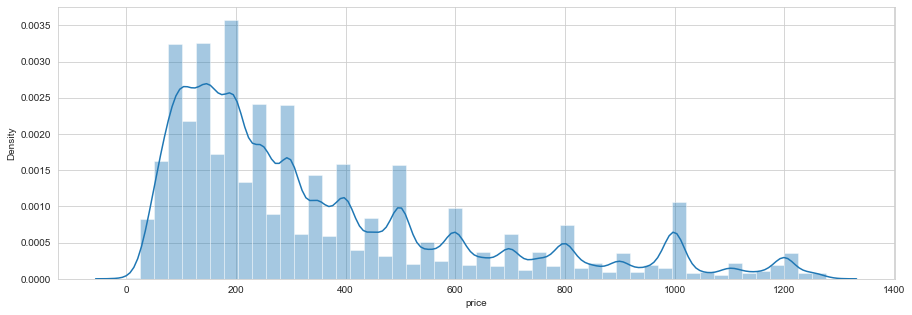

In [14]:
histogram(all_df["price"])

c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



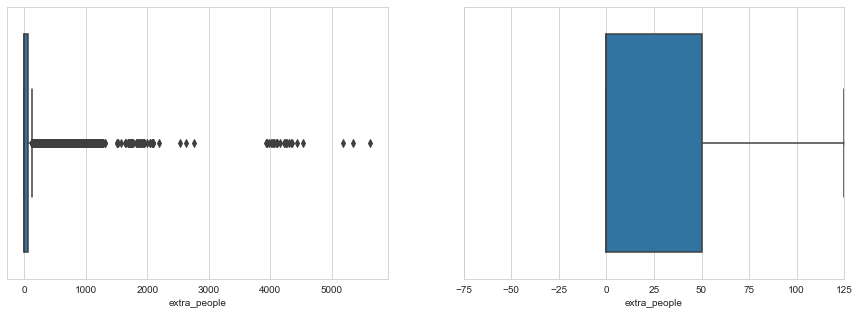

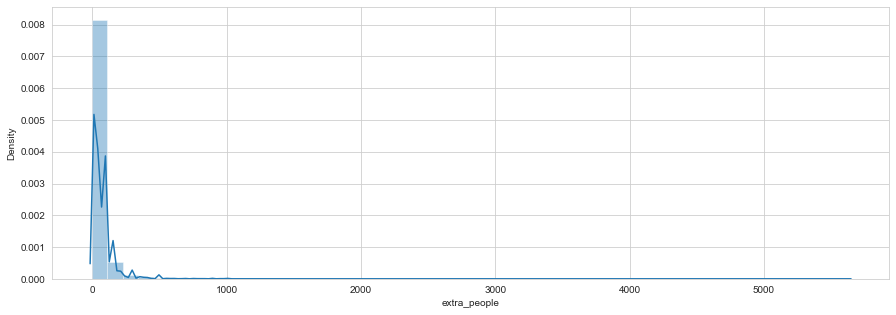

In [15]:
diagram_box(all_df["extra_people"])
histogram(all_df["extra_people"])

59194


c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



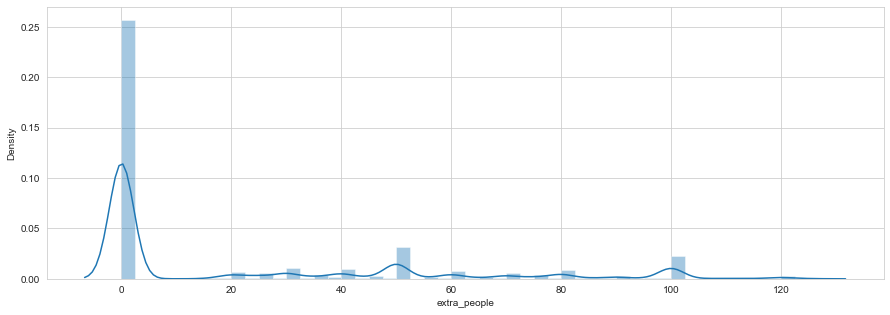

In [16]:
all_df, removed_lines = remove_outliers(all_df, "extra_people")
print(removed_lines)
histogram(all_df["extra_people"])

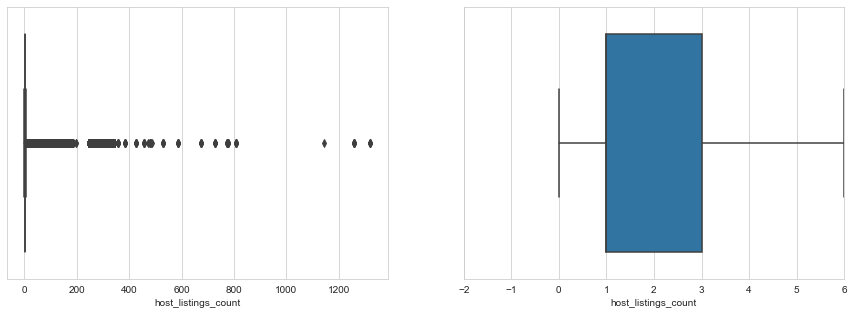

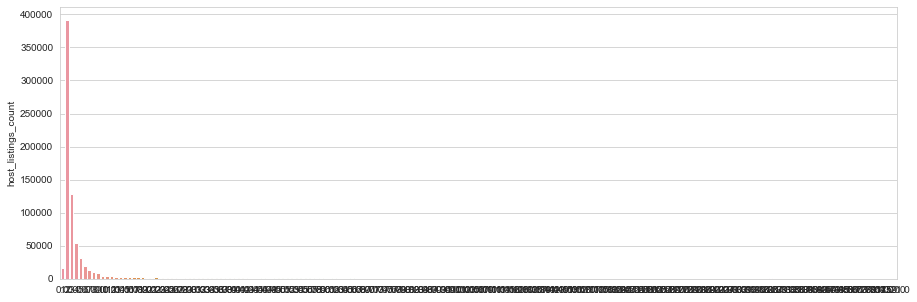

In [17]:
diagram_box(all_df["host_listings_count"])
bar(all_df["host_listings_count"])

In [18]:
all_df = all_df.drop("host_listings_count", axis = 1)

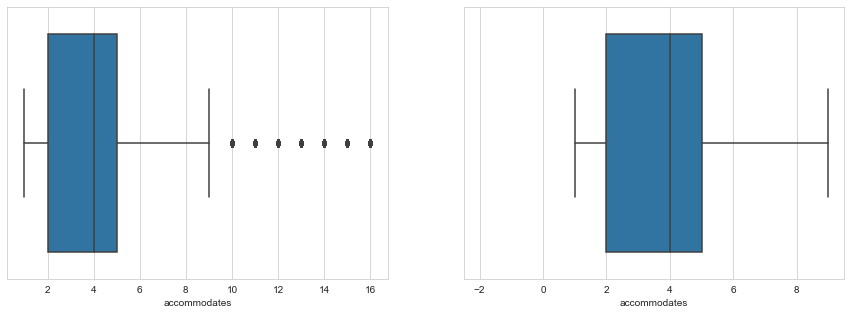

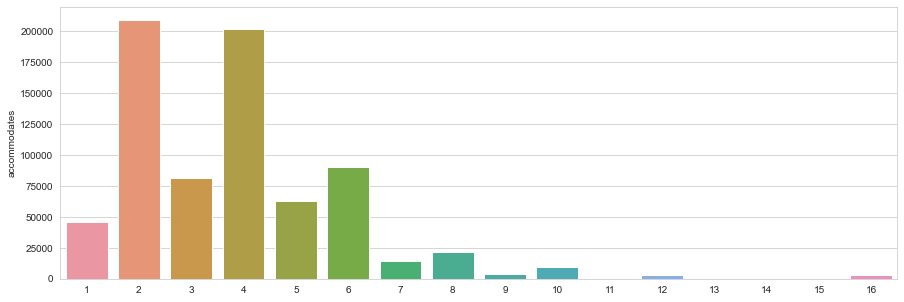

In [20]:
diagram_box(all_df["accommodates"])
bar(all_df["accommodates"])

<AxesSubplot:ylabel='bathrooms'>

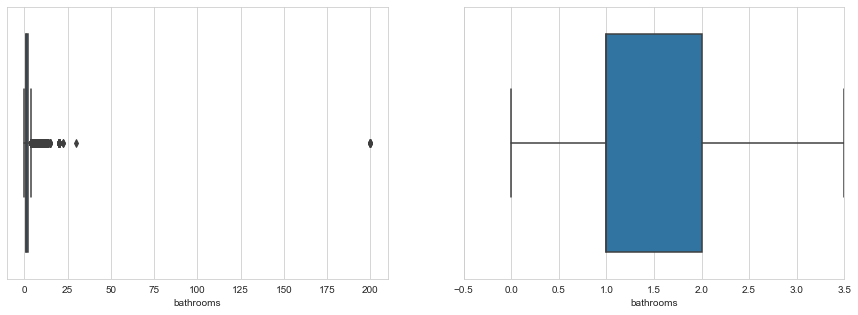

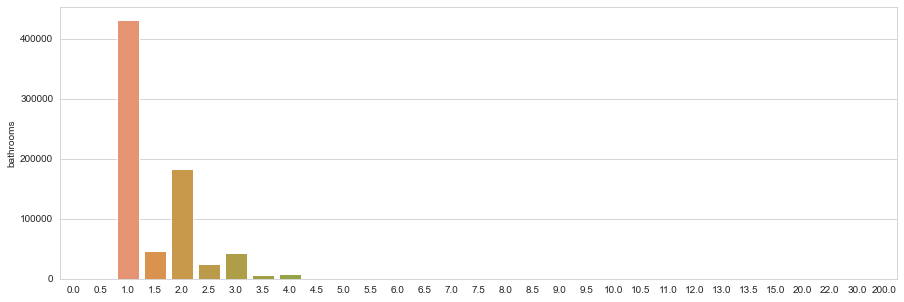

In [21]:
diagram_box(all_df["bathrooms"])
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["bathrooms"].value_counts().index, y=all_df["bathrooms"].value_counts())

13475


<AxesSubplot:ylabel='bathrooms'>

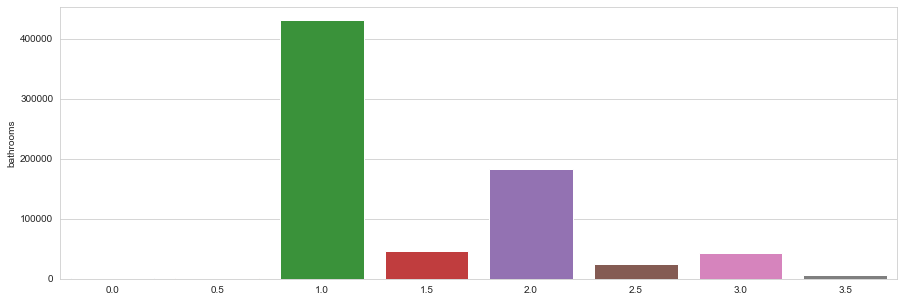

In [22]:
all_df, removed_lines = remove_outliers(all_df, "bathrooms")
print(removed_lines)
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["bathrooms"].value_counts().index, y=all_df["bathrooms"].value_counts())

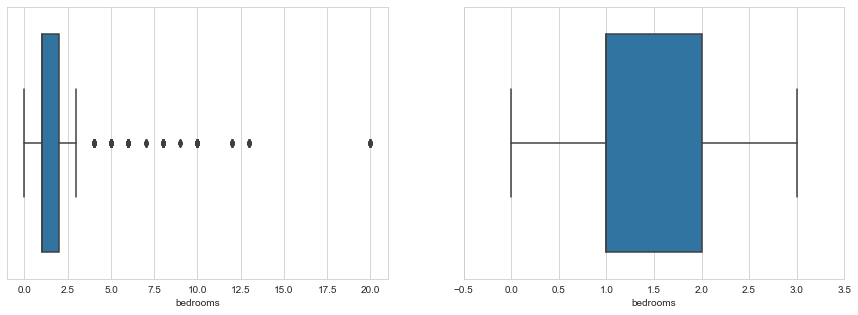

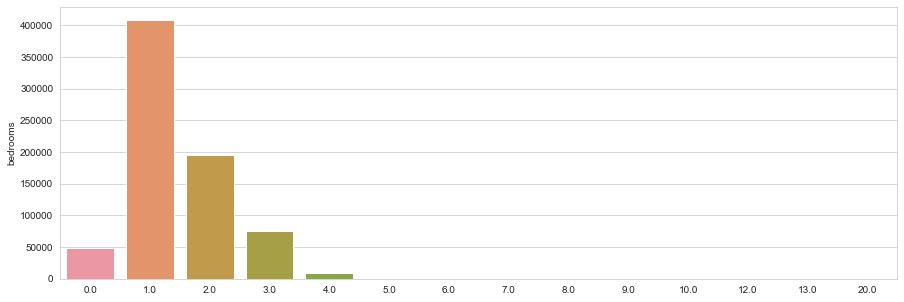

In [23]:
diagram_box(all_df["bedrooms"])
bar(all_df["bedrooms"])

10410


<AxesSubplot:ylabel='bedrooms'>

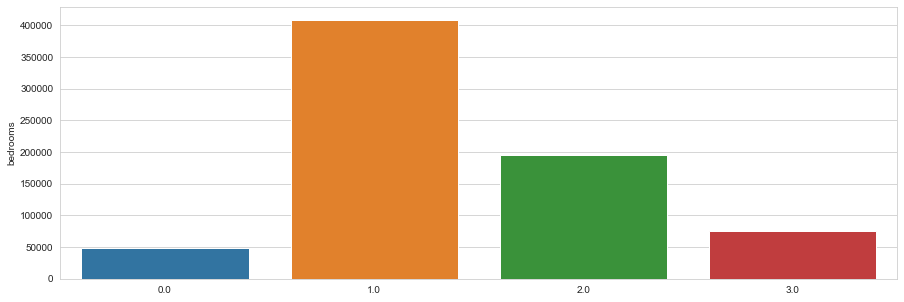

In [25]:
all_df, removed_lines = remove_outliers(all_df, "bedrooms")
print(removed_lines)
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["bedrooms"].value_counts().index, y=all_df["bedrooms"].value_counts())

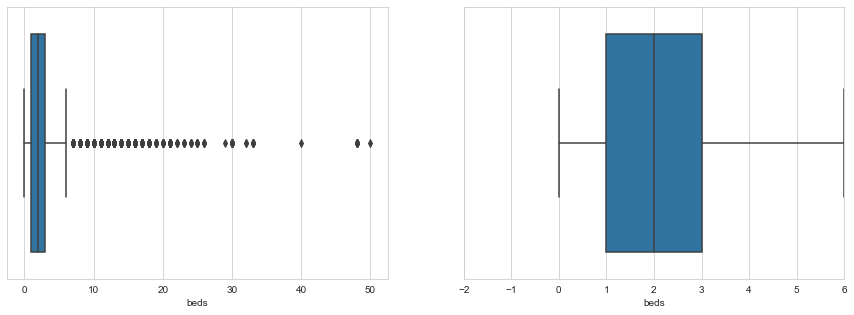

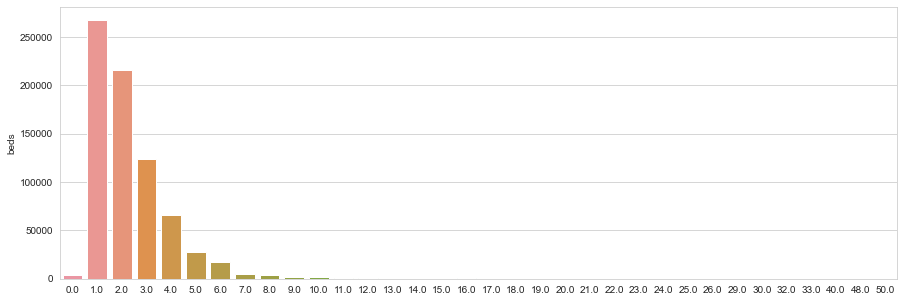

In [24]:
diagram_box(all_df["beds"])
bar(all_df["beds"])

10790


<AxesSubplot:ylabel='beds'>

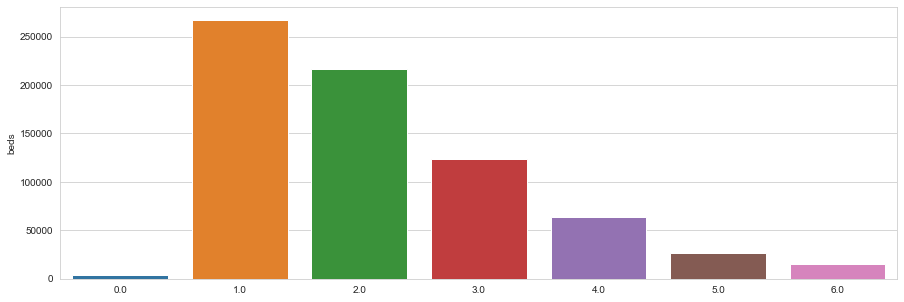

In [26]:
all_df, removed_lines = remove_outliers(all_df, "beds")
print(removed_lines)
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["beds"].value_counts().index, y=all_df["beds"].value_counts())

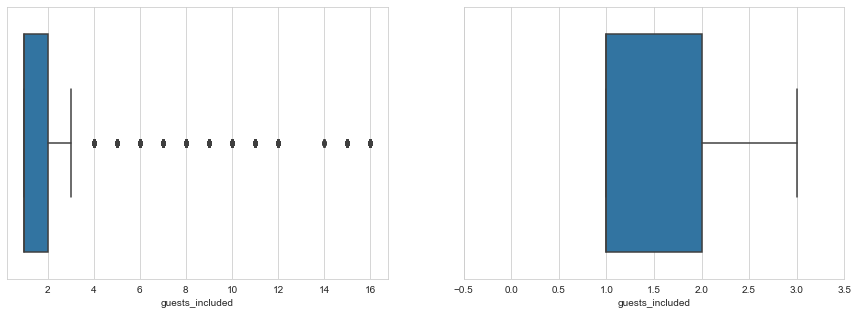

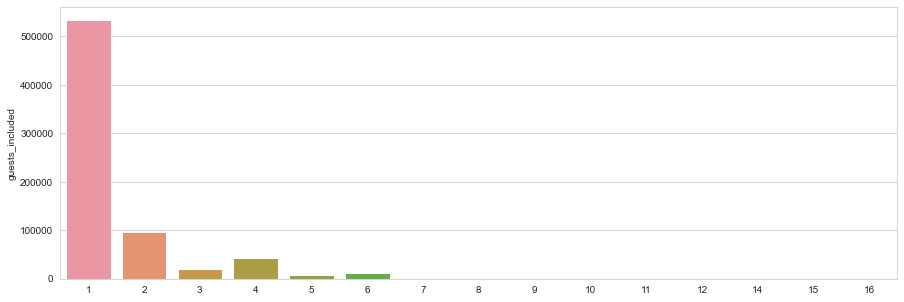

In [27]:
diagram_box(all_df["guests_included"])
bar(all_df["guests_included"])

In [28]:
all_df = all_df.drop("guests_included", axis = 1)

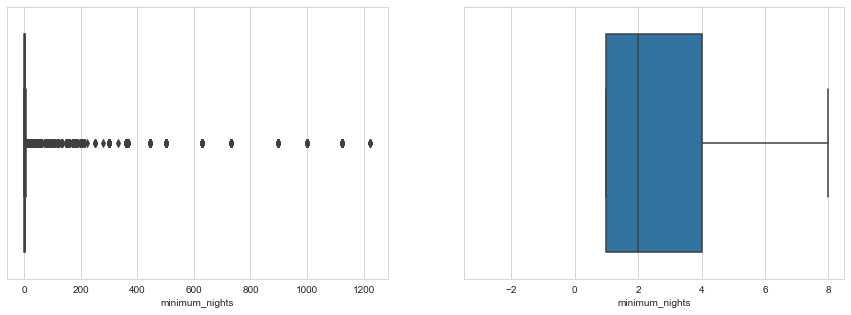

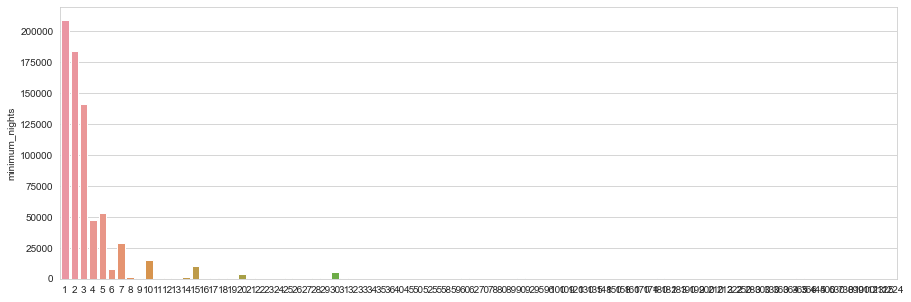

In [29]:
diagram_box(all_df["minimum_nights"])
bar(all_df["minimum_nights"])

43200


<AxesSubplot:ylabel='minimum_nights'>

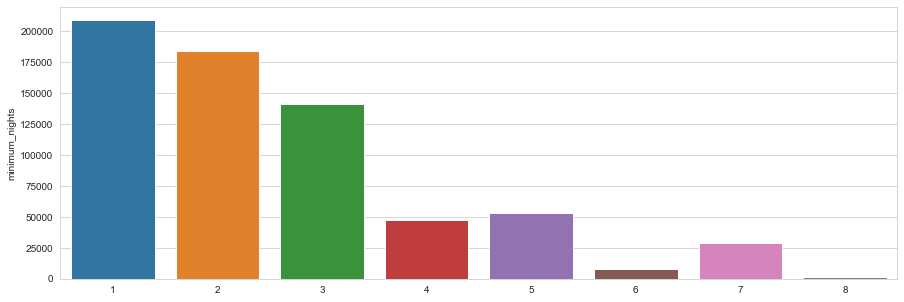

In [30]:
all_df, removed_lines = remove_outliers(all_df, "minimum_nights")
print(removed_lines)
plt.figure(figsize=(15,5))
sns.barplot(x=all_df["minimum_nights"].value_counts().index, y=all_df["minimum_nights"].value_counts())

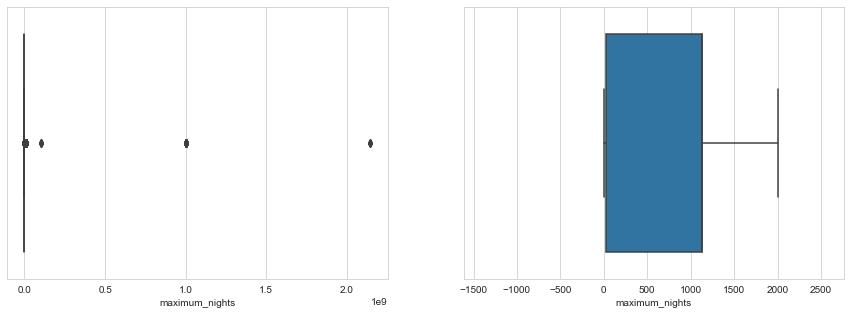

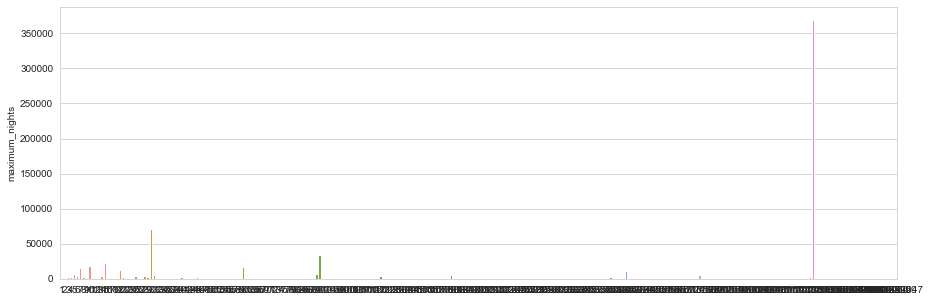

In [31]:
diagram_box(all_df["maximum_nights"])
bar(all_df["maximum_nights"])

In [32]:
all_df = all_df.drop("maximum_nights", axis = 1)

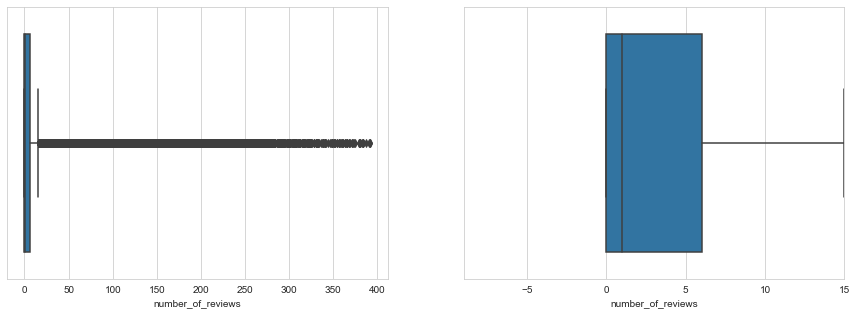

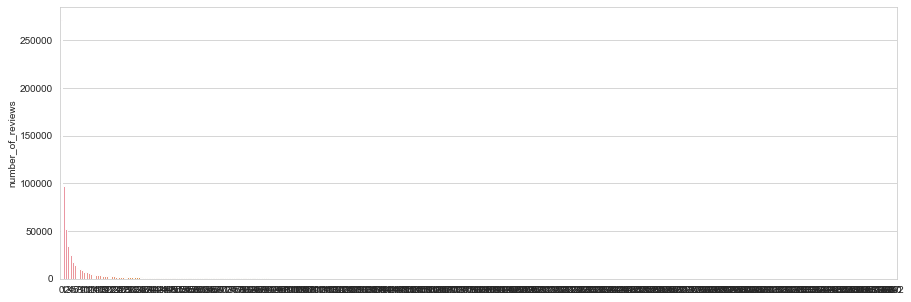

In [33]:
diagram_box(all_df["number_of_reviews"])
bar(all_df["number_of_reviews"])

In [34]:
all_df = all_df.drop("number_of_reviews", axis = 1)

In [36]:
print(all_df["property_type"].value_counts())

Apartment                 527691
House                      58335
Condominium                30894
Serviced apartment         17274
Loft                       13381
Bed and breakfast           4346
Guest suite                 4147
Hostel                      3373
Other                       2579
Guesthouse                  2472
Villa                       1394
Aparthotel                  1242
Hotel                       1144
Townhouse                   1116
Boutique hotel               531
Chalet                       523
Earth house                  511
Tiny house                   495
Casa particular (Cuba)       304
Cottage                      283
Bungalow                     227
Dorm                         195
Castle                       150
Cabin                        145
Nature lodge                 131
Treehouse                     76
Boat                          58
Island                        54
Hut                           41
Campsite                      34
Resort    

c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



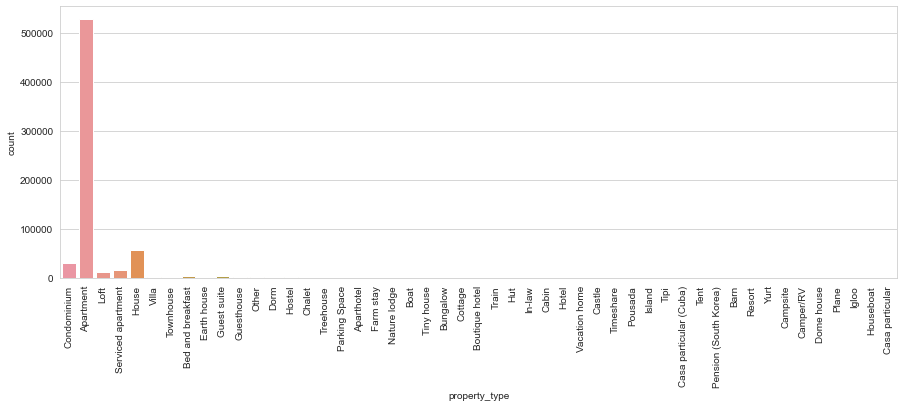

In [38]:
plt.figure(figsize=(15,5))
count_plt = sns.countplot("property_type", data = all_df)
count_plt.tick_params(axis = "x", rotation = 90)

In [39]:
table_types = all_df["property_type"].value_counts()
columns_group = list()
for ttype in table_types.index:
    if table_types[ttype] <= 2000:
        columns_group.append(ttype)

for ttype in columns_group:
    all_df.loc[all_df["property_type"] == ttype, "property_type"] = "Other"

In [41]:
print(all_df["property_type"].value_counts())

Apartment             527691
House                  58335
Condominium            30894
Serviced apartment     17274
Loft                   13381
Other                  11445
Bed and breakfast       4346
Guest suite             4147
Hostel                  3373
Guesthouse              2472
Name: property_type, dtype: int64


c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



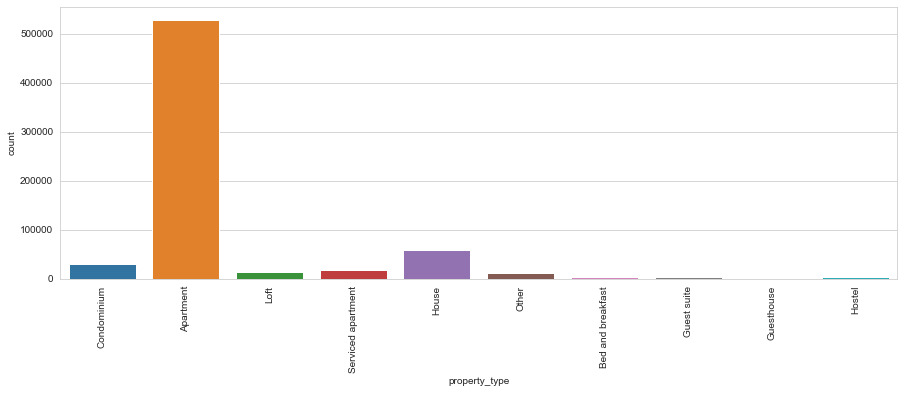

In [42]:
plt.figure(figsize=(15,5))
count_plt = sns.countplot("property_type", data = all_df)
count_plt.tick_params(axis = "x", rotation = 90)

In [44]:
print(all_df["room_type"].value_counts())

Entire home/apt    447475
Private room       209743
Shared room         14315
Hotel room           1825
Name: room_type, dtype: int64


c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



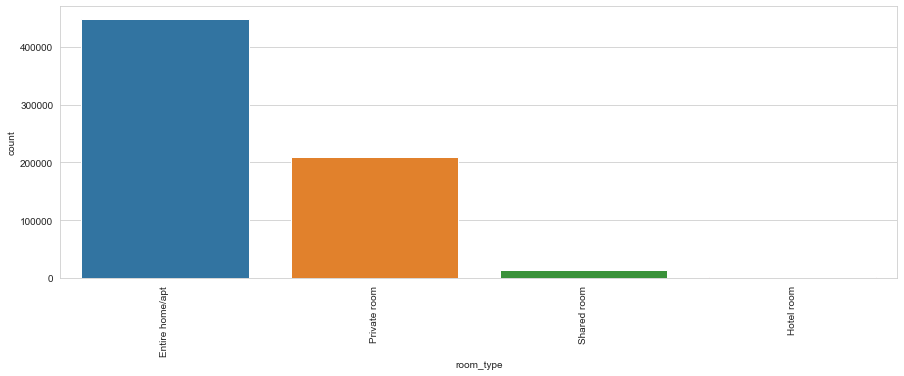

In [45]:
plt.figure(figsize=(15,5))
count_plt = sns.countplot("room_type", data = all_df)
count_plt.tick_params(axis = "x", rotation = 90)

In [46]:
print(all_df["bed_type"].value_counts())

Real Bed         661473
Pull-out Sofa      8281
Futon              1829
Airbed             1221
Couch               554
Name: bed_type, dtype: int64


c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



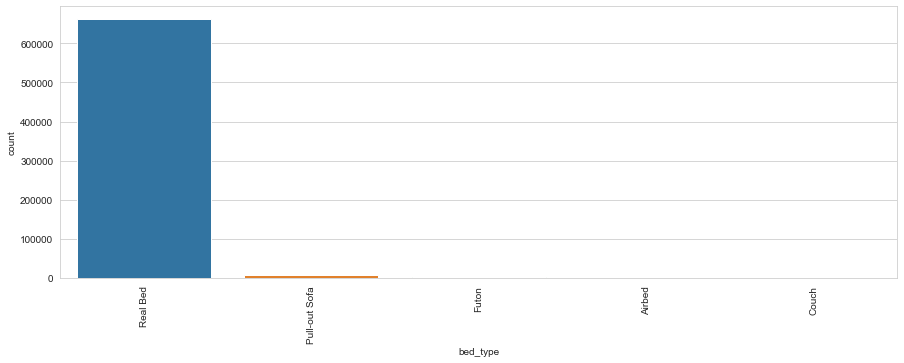

In [48]:
plt.figure(figsize=(15,5))
count_plt = sns.countplot("bed_type", data = all_df)
count_plt.tick_params(axis = "x", rotation = 90)

In [49]:
all_df = all_df.drop("bed_type", axis = 1)

In [50]:
print(all_df["cancellation_policy"].value_counts())

flexible                       280830
strict_14_with_grace_period    249838
moderate                       121906
strict                          12261
super_strict_60                  6103
super_strict_30                  2420
Name: cancellation_policy, dtype: int64


c:\Users\digof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



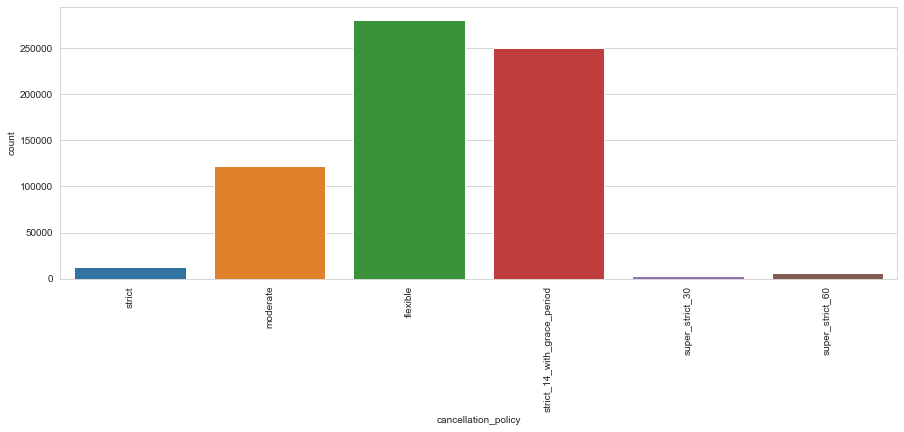

In [51]:
plt.figure(figsize=(15,5))
count_plt = sns.countplot("cancellation_policy", data = all_df)
count_plt.tick_params(axis = "x", rotation = 90)

In [52]:
all_df["num_of_amenities"] = all_df["amenities"].str.split(",").apply(len)
all_df = all_df.drop("amenities", axis = 1)

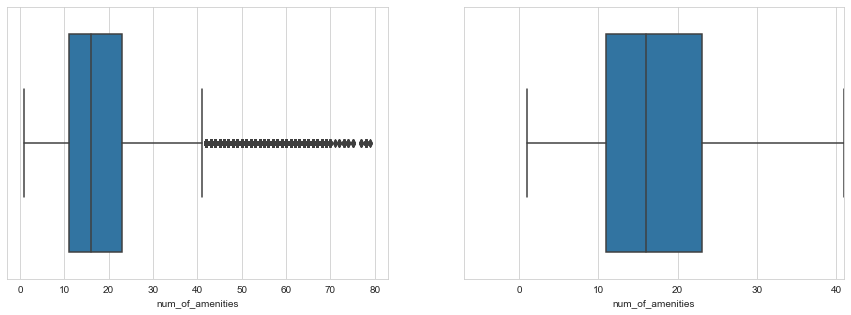

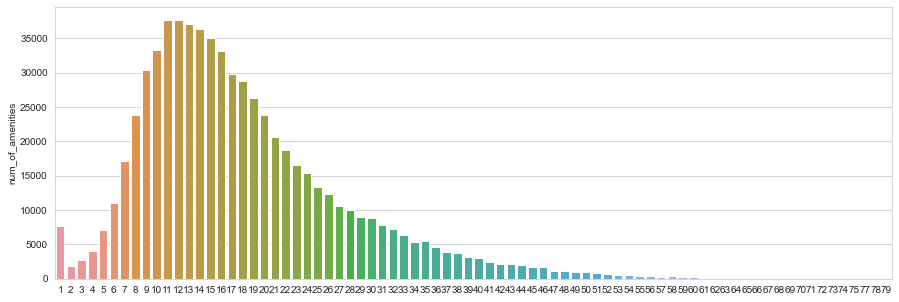

In [53]:
diagram_box(all_df["num_of_amenities"])
bar(all_df["num_of_amenities"])

In [54]:
all_df, removed_lines = remove_outliers(all_df, "num_of_amenities")
print(removed_lines)

19584


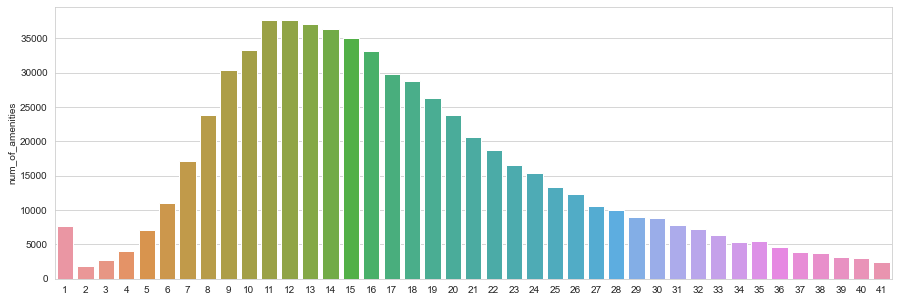

In [55]:
bar(all_df["num_of_amenities"])

In [56]:
sample = all_df.sample(n = 50000)
map_center = {"lat": sample.latitude.mean(), "lon": sample.longitude.mean()}
fig = px.density_mapbox(sample, lat="latitude", lon="longitude", z="price",
                        radius=2.5, center=map_center, zoom=10, mapbox_style="stamen-terrain")

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [57]:
tf_columns = ["host_is_superhost", "instant_bookable", "is_business_travel_ready"]
base_all_enc = all_df.copy()
for column in tf_columns:
    base_all_enc.loc[base_all_enc[column] == "t", column] = 1
    base_all_enc.loc[base_all_enc[column] == "f", column] = 0


In [59]:
cat_columns = ["property_type", "room_type", "cancellation_policy"]

base_all_enc = pd.get_dummies(data=base_all_enc, columns=cat_columns)

In [61]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653774 entries, 1 to 34328
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         653774 non-null  object 
 1   latitude                  653774 non-null  float64
 2   longitude                 653774 non-null  float64
 3   property_type             653774 non-null  object 
 4   room_type                 653774 non-null  object 
 5   accommodates              653774 non-null  int64  
 6   bathrooms                 653774 non-null  float64
 7   bedrooms                  653774 non-null  float64
 8   beds                      653774 non-null  float64
 9   price                     653774 non-null  float32
 10  extra_people              653774 non-null  float32
 11  minimum_nights            653774 non-null  int64  
 12  instant_bookable          653774 non-null  object 
 13  is_business_travel_ready  653774 non-null  ob

In [60]:
def eval_model(model_name, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    MSE = np.sqrt(mean_squared_error(y_test, prediction))
    return f"Model {model_name}:\nR²: {r2:.2%}\nMSE: {MSE}\n"

In [62]:
rf_model = RandomForestRegressor()
lr_model = LinearRegression()
et_model = ExtraTreesRegressor()

models = {"RandomForest": rf_model,
          "LinearRegression": lr_model,
          "ExtraTrees": et_model}

y = base_all_enc["price"]
x = base_all_enc.drop("price", axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

for model_name, model in models.items():
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    print(eval_model(model_name, y_test, prediction))

Model RandomForest:
R²: 96.80%
MSE: 46.90093153673537

Model LinearRegression:
R²: 32.48%
MSE: 215.4027443904507

Model ExtraTrees:
R²: 96.91%
MSE: 46.11477964606285



In [64]:
print(et_model.feature_importances_)
print(X_train.columns)

[0.01195992 0.11401044 0.11299842 0.07016974 0.08485124 0.12030152
 0.05394839 0.08098808 0.06476892 0.01896068 0.         0.01375023
 0.00732133 0.0955422  0.01220571 0.00132815 0.00589525 0.00073605
 0.00089672 0.00067152 0.00788567 0.00248923 0.00305912 0.0031277
 0.06227985 0.0003053  0.0045827  0.0018835  0.01795551 0.01244422
 0.00093235 0.00808707 0.00086262 0.00280064]
Index(['host_is_superhost', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'instant_bookable', 'is_business_travel_ready', 'year', 'month',
       'num_of_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_t

,0
bedrooms,0.120302
latitude,0.114010
longitude,0.112998
num_of_amenities,0.095542
bathrooms,0.084851
extra_people,0.080988
accommodates,0.070170
minimum_nights,0.064769
room_type_Entire home/apt,0.062280
beds,0.053948


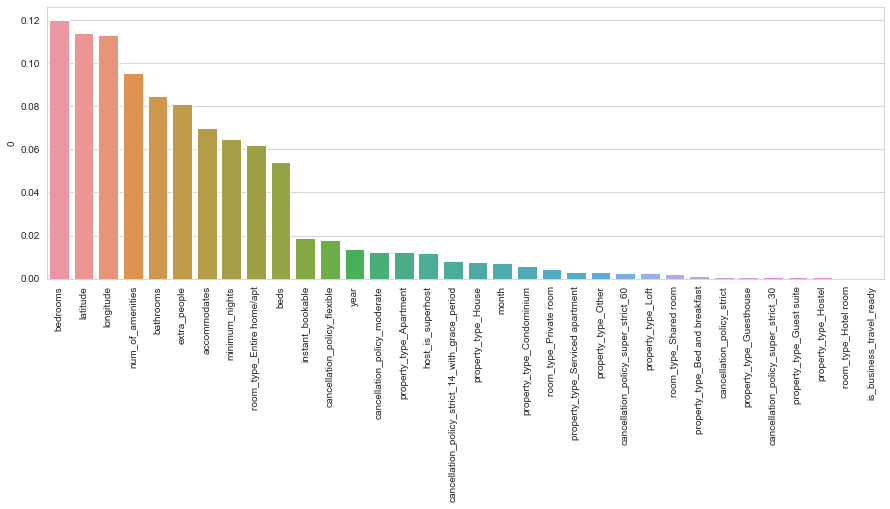

In [65]:
feat_importance = pd.DataFrame(model.feature_importances_, X_train.columns)
feat_importance = feat_importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=feat_importance.index, y=feat_importance[0])
ax.tick_params(axis="x", rotation=90)
display(feat_importance)

Model ExtraTrees:
R²: 96.91%
MSE: 46.09249562088107



,0
bedrooms,0.129912
latitude,0.113941
longitude,0.113019
num_of_amenities,0.095372
extra_people,0.080972
bathrooms,0.077434
accommodates,0.070583
minimum_nights,0.065069
room_type_Entire home/apt,0.058352
beds,0.054169


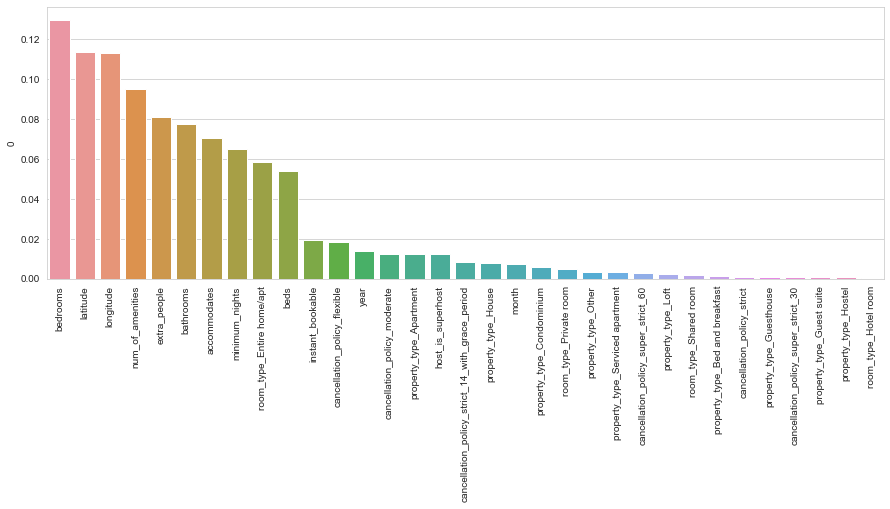

In [66]:
base_all_enc = base_all_enc.drop("is_business_travel_ready", axis=1)

y = base_all_enc["price"]
x = base_all_enc.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

et_model.fit(X_train, y_train)
prediction = et_model.predict(X_test)
print(eval_model("ExtraTrees", y_test, prediction))

feat_importance = pd.DataFrame(model.feature_importances_, X_train.columns)
feat_importance = feat_importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=feat_importance.index, y=feat_importance[0])
ax.tick_params(axis="x", rotation=90)
display(feat_importance)

In [67]:
x["price"] = y
x.to_csv("data.csv")

In [68]:
display(x)

,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,instant_bookable,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price
1,1,-22.965919,-43.178962,5,1.0,2.0,2.0,51.0,4,1,...,0,0,0,0,0,1,0,0,0,270.0
3,0,-22.977117,-43.190454,3,1.0,1.0,2.0,45.0,4,0,...,0,0,0,0,0,1,0,0,0,161.0
4,1,-22.983024,-43.214270,3,1.0,1.0,2.0,68.0,2,1,...,0,0,0,0,0,1,0,0,0,222.0
5,1,-22.988165,-43.193588,3,1.5,1.0,2.0,86.0,2,0,...,0,0,0,0,0,1,0,0,0,308.0
6,1,-22.981269,-43.190457,2,1.0,1.0,2.0,80.0,3,1,...,0,0,0,0,0,1,0,0,0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,0,-23.003180,-43.342840,4,1.0,0.0,2.0,50.0,1,0,...,0,0,0,1,0,0,0,0,0,121.0
34325,0,-22.966640,-43.393450,4,2.0,2.0,3.0,0.0,2,0,...,0,0,0,1,0,0,0,0,0,799.0
34326,0,-22.962080,-43.175520,5,1.0,1.0,2.0,30.0,3,0,...,0,0,0,0,0,0,1,0,0,420.0
34327,0,-23.003400,-43.341820,4,1.0,1.0,1.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,250.0


In [55]:
joblib.dump(et_model, "et_model.joblib")

['et_model.joblib']